In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [120]:
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

files_id = {
    'housing_data':"1VEpP7kLJjlLR9MyTgu2FyFnOJArh6U2b",
    'housing_data_ordy':"1jHl0STmNul4uPk9NeFrgtIuOnt8SqrgF" # adress to itaration 6 
}


housing_data = pd.read_csv(gd_path(files_id['housing_data']), sep=",")
housing_data_ordy = pd.read_csv(gd_path(files_id['housing_data_ordy']), sep=";")
#df = housing_data

# Pre-Processing Pipe

In [121]:
housing_data_ordy = housing_data_ordy.iloc[:, 1:] #drop broken index

## Ordinary columns

This part was done by hands. Many Bothans died to bring us this information.

In [122]:
# Remove the ordinary(categorical lables) columns 
columns_to_remove = ['LandContour', 'LandSlope', 'OverallQual', 'OverallCond',
                     'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                     'HeatingQC', 'KitchenQual', 'Functional',
                     'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                     'PoolQC']

housing_data_sml = housing_data.drop(columns=columns_to_remove).copy()

In [123]:
housing_data_sml

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,MSSubClass,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,Utilities,LotConfig,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,60,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,1,8,2003.0,548,61,0,0,0,2,2008,1,NaN,Reg,AllPub,Inside,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,SBrkr,Attchd,Y,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock,20,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,1,6,1976.0,460,0,0,0,0,5,2007,2,NaN,Reg,AllPub,FR2,Veenker,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,SBrkr,Attchd,Y,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,60,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,1,6,2001.0,608,42,0,0,0,9,2008,3,NaN,IR1,AllPub,Inside,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,SBrkr,Attchd,Y,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil,70,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,1,7,1998.0,642,35,272,0,0,2,2006,4,NaN,IR1,AllPub,Corner,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,SBrkr,Detchd,Y,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc,60,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,1,9,2000.0,836,84,0,0,0,12,2008,5,NaN,IR1,AllPub,FR2,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,SBrkr,Attchd,Y,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,60,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,1,7,1999.0,460,40,0,0,0,8,2007,1456,NaN,Reg,AllPub,Inside,Gilbert,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,SBrkr,Attchd,Y,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,RL,Norm,GasA,Pave,Y,CBlock,20,1978,1988,119.0,790,163,589,2073,0,0,2073,1,0,2,0,1,7,1978.0,500,0,0,0,0,2,2010,1457,NaN,Reg,AllPub,Inside,NWAmes,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,SBrkr,Attchd,Y,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,RL,Norm,GasA,Pave,Y,Stone,70,1941,2006,0.0,275,0,877,1188,1152,0,2340,0,0,2,0,1,9,1941.0,252,60,0,0,2500,5,2010,1458,NaN,Reg,AllPub,Inside,Crawfor,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,SBrkr,Attchd,Y,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,RL,Norm,GasA,Pave,Y,CBlock,20,1950,1996,0.0,49,1029,0,1078,0,0,1078,1,0,1,0,1,5,1950.0,240,0,112,0,0,4,2010,1459,NaN,Reg,AllPub,Inside,NAmes,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,FuseA,Attchd,Y,NaN,NaN,WD,Normal


In [124]:
# Add the orinary(numerical lables) columns

df =pd.concat([housing_data_sml,housing_data_ordy], axis=1)

In [125]:
df

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,MSSubClass,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,Utilities,LotConfig,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,LandContour,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,60,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,1,8,2003.0,548,61,0,0,0,2,2008,1,NaN,Reg,AllPub,Inside,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,SBrkr,Attchd,Y,NaN,NaN,WD,Normal,3,2,6,4,3,2,3,2,0,6,1,4,3,7,0,2,2,2,0
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock,20,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,1,6,1976.0,460,0,0,0,0,5,2007,2,NaN,Reg,AllPub,FR2,Veenker,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,SBrkr,Attchd,Y,NaN,NaN,WD,Normal,3,2,5,7,2,2,3,2,3,5,1,4,2,7,2,2,2,2,0
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,60,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,1,6,2001.0,608,42,0,0,0,9,2008,3,NaN,IR1,AllPub,Inside,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,SBrkr,Attchd,Y,NaN,NaN,WD,Normal,3,2,6,4,3,2,3,2,1,6,1,4,3,7,2,2,2,2,0
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil,70,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,1,7,1998.0,642,35,272,0,0,2,2006,4,NaN,IR1,AllPub,Corner,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,SBrkr,Detchd,Y,NaN,NaN,WD,Abnorml,3,2,6,4,2,2,2,3,0,5,1,3,3,7,3,1,2,2,0
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc,60,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,1,9,2000.0,836,84,0,0,0,12,2008,5,NaN,IR1,AllPub,FR2,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,SBrkr,Attchd,Y,NaN,NaN,WD,Normal,3,2,7,4,3,2,3,2,2,6,1,4,3,7,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,60,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,1,7,1999.0,460,40,0,0,0,8,2007,1456,NaN,Reg,AllPub,Inside,Gilbert,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,SBrkr,Attchd,Y,NaN,NaN,WD,Normal,3,2,5,4,2,2,3,2,0,1,1,4,2,7,2,2,2,2,0
1456,13175,85.0,1542,3,2,0,2,349,0,0,RL,Norm,GasA,Pave,Y,CBlock,20,1978,1988,119.0,790,163,589,2073,0,0,2073,1,0,2,0,1,7,1978.0,500,0,0,0,0,2,2010,1457,NaN,Reg,AllPub,Inside,NWAmes,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,SBrkr,Attchd,Y,MnPrv,NaN,WD,Normal,3,2,5,5,2,2,3,2,0,5,3,2,2,6,2,1,2,2,0
1457,9042,66.0,1152,4,2,0,1,0,0,1,RL,Norm,GasA,Pave,Y,Stone,70,1941,2006,0.0,275,0,877,1188,1152,0,2340,0,0,2,0,1,9,1941.0,252,60,0,0,2500,5,2010,1458,NaN,Reg,AllPub,Inside,Crawfor,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,SBrkr,Attchd,Y,GdPrv,Shed,WD,Normal,3,2,6,8,4,3,2,3,0,6,1,4,3,7,3,2,2,2,0
1458,9717,68.0,1078,2,0,0,1,366,0,0,RL,Norm,GasA,Pave,Y,CBlock,20,1950,1996,0.0,49,1029,0,1078,0,0,1078,1,0,1,0,1,5,1950.0,240,0,112,0,0,4,2010,1459,NaN,Reg,AllPub,Inside,NAmes,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,FuseA,Attchd,Y,NaN,NaN,WD,Normal,3,2,4,5,2,2,2,2,1,6,3,3,3,7,0,1,2,2,0


In [126]:
from sklearn.model_selection import train_test_split

# X and y creation
y = df.pop("Expensive")

# Feature Engineering
X = df.drop(columns=["LotFrontage"])

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# Modelling Pipe - 1

## Decisiontree - Creation

In [127]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.9297824731301125}

## Decisiontree - Analysis

### Confusion Matrix

accuracy train:0.9726027397260274
accuracy test:0.928082191780822
delta:0.044520547945205435


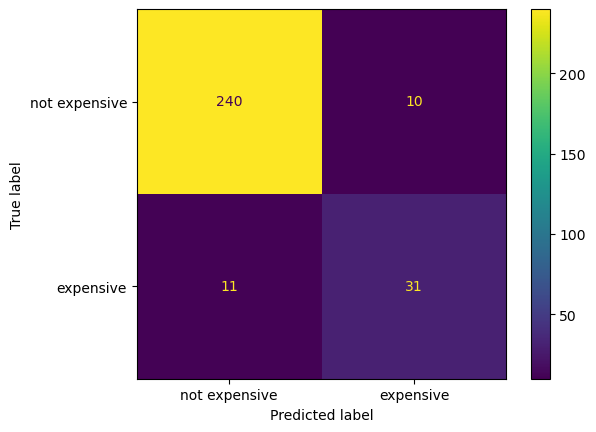

In [128]:
# test accuracy wich a confusion matrix 
tr = accuracy_score(search.predict(X_train), y_train)
te = accuracy_score(search.predict(X_test), y_test)

print('accuracy train:'+ str(tr))
print('accuracy test:'+ str(te))
print('delta:'+ str(tr-te))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['not expensive', 'expensive']);


In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Get predictions for the training and testing datasets
y_train_pred = search.predict(X_train)
y_test_pred = search.predict(X_test)

# Create confusion matrices
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracy for training and testing datasets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

print("Confusion Matrix (Training):\n", confusion_matrix_train)
print("Confusion Matrix (Testing):\n", confusion_matrix_test)

Training Accuracy: 0.9726027397260274
Testing Accuracy: 0.928082191780822
Confusion Matrix (Training):
 [[979  14]
 [ 18 157]]
Confusion Matrix (Testing):
 [[240  10]
 [ 11  31]]


### F-Score

In [136]:
from sklearn.metrics import f1_score
print("Training Accuracy:", f1_score(y_train,y_train_pred))
print("Testing Accuracy:", f1_score(y_test,y_test_pred))

Training Accuracy: 0.9075144508670521
Testing Accuracy: 0.746987951807229


### Kappa

In [138]:
from sklearn.metrics import cohen_kappa_score
print("Training Accuracy:", cohen_kappa_score(y_train,y_train_pred))
print("Testing Accuracy:", cohen_kappa_score(y_test,y_test_pred))

Training Accuracy: 0.8914365716078285
Testing Accuracy: 0.705078876490958
